# Banana classification example with boundary

Copyright 2018-2019 Manon Kok and Arno Solin

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import gpflow
import DGP
import matplotlib.image as mpimg
from DGP.domain import gp_domain

# Load data
X = np.loadtxt('banana_X_train', delimiter=',')
Y = np.loadtxt('banana_Y_train')[:, None]
B = np.loadtxt('banana_boundary', delimiter=',')
im = mpimg.imread('banana_mask.png')

# Test points
xtest, ytest = np.mgrid[-3.5:3.5:100j, -3.5:3.5:100j]
Xtest = np.vstack((xtest.flatten(), ytest.flatten())).T

# Convert image to binary mask of domain
mask = im < 0.5

# Set up GP prior and likelihood
lik = gpflow.likelihoods.Bernoulli
k = gpflow.kernels.Matern32

In [37]:
# Set up models
models = []
for ms in [4, 8, 16, 32, 64, 128]:
    domain = gp_domain(mask,(-3.5,3.5),(-3.5,3.5),ms)
    m = DGP.DGP(X, Y, ms, domain, kern=k(2), lik = lik, Xtest=Xtest)
    models.append(m)
    

In [38]:
# Train models
for m in models:
    try:
        m.compile()
        gpflow.train.ScipyOptimizer().minimize(m)
    except:
        print('Model optimization failed.')

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 270.079940
  Number of iterations: 39
  Number of functions evaluations: 41


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 270.079940
  Number of iterations: 39
  Number of functions evaluations: 41


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 240.156001
  Number of iterations: 54
  Number of functions evaluations: 59


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 240.156001
  Number of iterations: 54
  Number of functions evaluations: 59


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 148.251968
  Number of iterations: 71
  Number of functions evaluations: 79


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 148.251968
  Number of iterations: 71
  Number of functions evaluations: 79


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 141.103970
  Number of iterations: 99
  Number of functions evaluations: 111


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 141.103970
  Number of iterations: 99
  Number of functions evaluations: 111


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 133.752453
  Number of iterations: 189
  Number of functions evaluations: 205


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 133.752453
  Number of iterations: 189
  Number of functions evaluations: 205


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 131.626078
  Number of iterations: 318
  Number of functions evaluations: 350


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 131.626078
  Number of iterations: 318
  Number of functions evaluations: 350


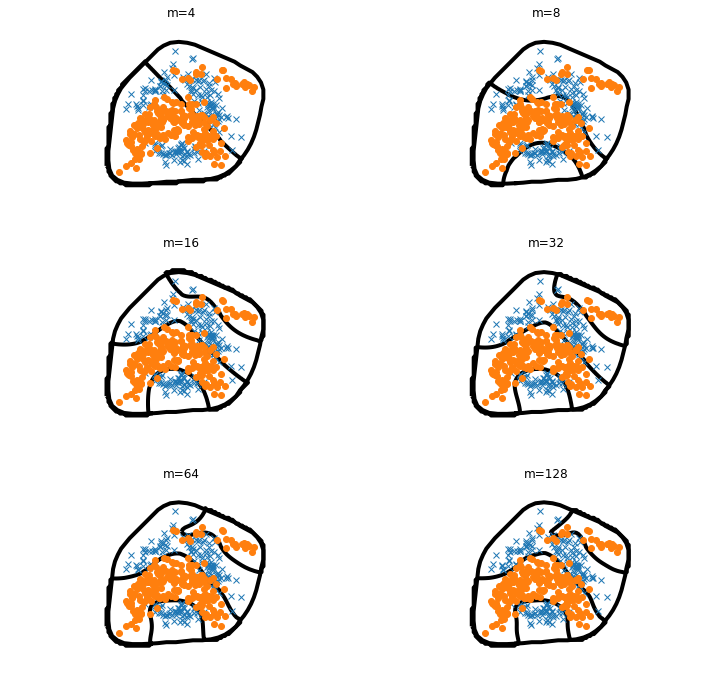

In [44]:
# Set up plotting
def plot(m, ax):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    xtest, ytest = np.mgrid[-3.5:3.5:100j, -3.5:3.5:100j]
    Xtest = np.vstack((xtest.flatten(), ytest.flatten())).T
    for i, mark in [[0, 'x'], [1, 'o']]:
        ind = m.Y.value[:, 0] == i
        ax.plot(m.X.value[ind, 0], m.X.value[ind, 1], mark)
    mu, var = m.predict_y(Xtest)
    ax.contour(xtest, ytest, mu.reshape(100, 100), levels=[.5],
               colors='k', linewidths=4)
    ax.plot(B[:,0],B[:,1],linewidth=4,color='k')
    ax.axis('equal')
    ax.axis('off')
    ax.set_xlim(-3.5, 3.5)
    ax.set_ylim(-3.5, 3.5)

# Visualize the model predictions
labels = ['m=4', 'm=8', 'm=16', 'm=32', 'm=64', 'm=128']
f, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
for ax, lab, m in zip(axes, labels, models):
    plot(m, ax)
    ax.set_title(lab)    
    